## Import dependencies and read csv

In [2]:
import warnings
import pickle
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.ensemble import RandomForestClassifier

In [4]:
file_path='Resources/ML_Input_Jan2021.csv'
df=pd.read_csv(file_path)

In [5]:
df.head()

,q_id,accepted_answer_id,q_score,q_score_tier,q_view_count,q_view_count_bin,q_title_char_count,q_title_char_count_bin,q_title_word_count,q_title_word_count_bin,q_body_word_count,q_body_len_bin,q_tags_count,q_day,q_hour,q_hour_min,accepted_answer_duration
0,65526420,65526457,2,Positive Score (>0),62,50-16000,72,Medium (50-100),13,Medium (10-20),116,100-250,3,Friday,0,00:05,0.122066
1,65526423,65526533,2,Positive Score (>0),48,40-50,48,Short (0 - 50),8,Short (0 - 10),58,50-100,2,Friday,0,00:06,0.475172
2,65526490,65526541,2,Positive Score (>0),35,30-40,81,Medium (50-100),13,Medium (10-20),117,100-250,2,Friday,0,00:20,0.287423
3,65526419,65526554,3,Positive Score (>0),351,50-16000,76,Medium (50-100),9,Short (0 - 10),50,<50,4,Friday,0,00:05,0.575997
4,65526523,65526577,2,Positive Score (>0),117,50-16000,82,Medium (50-100),14,Medium (10-20),305,250-500,3,Friday,0,00:30,0.253412


## Data Preprocessing

- Dropped null values and dropped uncessary columns
- Binned data in accepted_answer_duration

In [6]:
#drop identification columns also q_hour_min and q_body_len_bin columns as they are redundant to other columns

df=df.drop(['q_id','accepted_answer_id','q_hour_min','q_body_len_bin','q_score','q_view_count'], axis=1)
df.head()

,q_score_tier,q_view_count_bin,q_title_char_count,q_title_char_count_bin,q_title_word_count,q_title_word_count_bin,q_body_word_count,q_tags_count,q_day,q_hour,accepted_answer_duration
0,Positive Score (>0),50-16000,72,Medium (50-100),13,Medium (10-20),116,3,Friday,0,0.122066
1,Positive Score (>0),40-50,48,Short (0 - 50),8,Short (0 - 10),58,2,Friday,0,0.475172
2,Positive Score (>0),30-40,81,Medium (50-100),13,Medium (10-20),117,2,Friday,0,0.287423
3,Positive Score (>0),50-16000,76,Medium (50-100),9,Short (0 - 10),50,4,Friday,0,0.575997
4,Positive Score (>0),50-16000,82,Medium (50-100),14,Medium (10-20),305,3,Friday,0,0.253412


In [7]:
df=df.dropna()

In [8]:
#bin accepted_answer_duration

answer_bins = [0, 24, 6000]
answer_bins_group_names = ["<1D", ">1D"]

# Categorize score based on the bins.
df['accepted_answer_duration_bin'] = pd.cut(df['accepted_answer_duration'], answer_bins, labels=answer_bins_group_names)

In [9]:
df.head()

,q_score_tier,q_view_count_bin,q_title_char_count,q_title_char_count_bin,q_title_word_count,q_title_word_count_bin,q_body_word_count,q_tags_count,q_day,q_hour,accepted_answer_duration,accepted_answer_duration_bin
0,Positive Score (>0),50-16000,72,Medium (50-100),13,Medium (10-20),116,3,Friday,0,0.122066,<1D
1,Positive Score (>0),40-50,48,Short (0 - 50),8,Short (0 - 10),58,2,Friday,0,0.475172,<1D
2,Positive Score (>0),30-40,81,Medium (50-100),13,Medium (10-20),117,2,Friday,0,0.287423,<1D
3,Positive Score (>0),50-16000,76,Medium (50-100),9,Short (0 - 10),50,4,Friday,0,0.575997,<1D
4,Positive Score (>0),50-16000,82,Medium (50-100),14,Medium (10-20),305,3,Friday,0,0.253412,<1D


In [10]:
df.dtypes

q_score_tier                      object
q_view_count_bin                  object
q_title_char_count                 int64
q_title_char_count_bin            object
q_title_word_count                 int64
q_title_word_count_bin            object
q_body_word_count                  int64
q_tags_count                       int64
q_day                             object
q_hour                             int64
accepted_answer_duration         float64
accepted_answer_duration_bin    category
dtype: object

## Create features and encode our features using pd.get_dummies

In [11]:
# Create our features
X = df.drop(['accepted_answer_duration','accepted_answer_duration_bin','q_title_char_count_bin'], axis=1)
X = pd.get_dummies(X)

# Create our target

y = df["accepted_answer_duration_bin"]

X.head()

,q_title_char_count,q_title_word_count,q_body_word_count,q_tags_count,q_hour,q_score_tier_Negative Score (<0),q_score_tier_Positive Score (>0),q_score_tier_Zero Score (0),q_view_count_bin_10-20,q_view_count_bin_20-30,...,q_title_word_count_bin_Medium (10-20),q_title_word_count_bin_Short (0 - 10),q_title_word_count_bin_XL (30+),q_day_Friday,q_day_Monday,q_day_Saturday,q_day_Sunday,q_day_Thursday,q_day_Tuesday,q_day_Wednesday
0,72,13,116,3,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,48,8,58,2,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,81,13,117,2,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,76,9,50,4,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,82,14,305,3,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [12]:
# Check the balance of our target values
y.value_counts()

<1D    386440
>1D     60979
Name: accepted_answer_duration_bin, dtype: int64

## Split data to training and testing sets

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,stratify=y)

# Random Forest Classifier
## Fit model

In [14]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

brfc = BalancedRandomForestClassifier(n_estimators=100,random_state=1)
rf = brfc.fit(X_train,y_train)

In [15]:
pickle.dump(brfc, open('model.pkl', 'wb'))


In [16]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)

array(['<1D', '<1D', '<1D', ..., '>1D', '<1D', '<1D'], dtype=object)

In [17]:
y_pred=pickled_model.predict(X_test)
balanced_accuracy_score(y_test,y_pred)

0.6093991256022591

## Calculate Accuracy

In [18]:
# Calculated the balanced accuracy score
y_pred=rf.predict(X_test)
ba_balanced_forest=balanced_accuracy_score(y_test,y_pred)
ba_balanced_forest

0.6093991256022591

## Display Confusion Matrix


In [14]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

cm_df=pd.DataFrame(cm,
                  index=["Actual <1D", "Actual >1D"],
                  columns=["Predicted <1D", "Predicted >1D"])
cm_df

,Predicted <1D,Predicted >1D
Actual <1D,59066,37544
Actual >1D,5985,9260


## Print additional scores for analysis: precision, recall, and f1

In [15]:
#imbalanced classification report
icr_balanced_forest=classification_report_imbalanced(y_test,y_pred)

In [16]:
#Summary of findings

print(f'For the Balanced Random Forest Classifier algortihm, the balanced accuracy score is {ba_balanced_forest}' 
      f'\n\nand the imbalanced classifcation report is:\n\n{icr_balanced_forest}')

For the Balanced Random Forest Classifier algortihm, the balanced accuracy score is 0.6093991256022591

and the imbalanced classifcation report is:

                   pre       rec       spe        f1       geo       iba       sup

        <1D       0.91      0.61      0.61      0.73      0.61      0.37     96610
        >1D       0.20      0.61      0.61      0.30      0.61      0.37     15245

avg / total       0.81      0.61      0.61      0.67      0.61      0.37    111855



## Feature Importance

In [17]:
# List the features sorted in descending order by feature importance
sorted(zip(rf.feature_importances_, X.columns), reverse=True)

[(0.26581440533938167, 'q_body_word_count'),
 (0.21945696793549924, 'q_title_char_count'),
 (0.18330686673251512, 'q_hour'),
 (0.11253601396877579, 'q_title_word_count'),
 (0.05740546325776691, 'q_tags_count'),
 (0.03566203158864189, 'q_view_count_bin_50-16000'),
 (0.010766041698690111, 'q_day_Thursday'),
 (0.010412239982643564, 'q_day_Tuesday'),
 (0.010380043252825268, 'q_day_Wednesday'),
 (0.010195998693345655, 'q_day_Monday'),
 (0.009075162985430294, 'q_view_count_bin_20-30'),
 (0.009040632510808527, 'q_day_Saturday'),
 (0.008649329911996368, 'q_day_Sunday'),
 (0.008431817599653812, 'q_view_count_bin_30-40'),
 (0.007994526947916492, 'q_day_Friday'),
 (0.007983184886605195, 'q_score_tier_Zero Score (0)'),
 (0.006908080918690472, 'q_score_tier_Positive Score (>0)'),
 (0.006093119539042898, 'q_score_tier_Negative Score (<0)'),
 (0.005282073952144683, 'q_view_count_bin_40-50'),
 (0.004654994767301666, 'q_title_word_count_bin_Medium (10-20)'),
 (0.004429088189627105, 'q_title_word_count_

# Logistic Regression

In [18]:
 %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [33]:
 # Read the CSV file into a Pandas DataFrame

notes = pd.read_csv('Resources/ML_Input_Jan2021.csv', 
#                     header=0, 
#                     names=['accepted_answer_duration','accepted_answer_duration_bin','q_title_char_count_bin']
                   )
notes.head()

,q_id,accepted_answer_id,q_score,q_score_tier,q_view_count,q_view_count_bin,q_title_char_count,q_title_char_count_bin,q_title_word_count,q_title_word_count_bin,q_body_word_count,q_body_len_bin,q_tags_count,q_day,q_hour,q_hour_min,accepted_answer_duration
0,65526420,65526457,2,Positive Score (>0),62,50-16000,72,Medium (50-100),13,Medium (10-20),116,100-250,3,Friday,0,00:05,0.122066
1,65526423,65526533,2,Positive Score (>0),48,40-50,48,Short (0 - 50),8,Short (0 - 10),58,50-100,2,Friday,0,00:06,0.475172
2,65526490,65526541,2,Positive Score (>0),35,30-40,81,Medium (50-100),13,Medium (10-20),117,100-250,2,Friday,0,00:20,0.287423
3,65526419,65526554,3,Positive Score (>0),351,50-16000,76,Medium (50-100),9,Short (0 - 10),50,<50,4,Friday,0,00:05,0.575997
4,65526523,65526577,2,Positive Score (>0),117,50-16000,82,Medium (50-100),14,Medium (10-20),305,250-500,3,Friday,0,00:30,0.253412


In [83]:
 # Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape() to create this

X = df[['q_body_word_count','q_title_char_count_bin','q_hour']]
y = df['accepted_answer_duration_bin']

print("Shape: ", X.shape, y.shape)

Shape:  (447419, 3) (447419,)


In [90]:
y.value_counts()

<1D    386440
>1D     60979
Name: accepted_answer_duration_bin, dtype: int64

In [ ]:
## data set is imbalanced

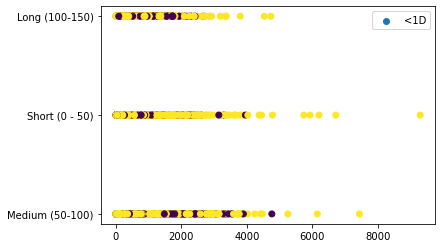

In [89]:
 # Visualizing both classes    
plt.scatter(X['q_body_word_count'], X['q_title_char_count_bin'], c=y.apply(lambda x: x == '<1D'))
plt.legend(y.unique())

In [77]:
X = pd.get_dummies(X, columns = ['q_title_char_count_bin'])
X.head()

,q_body_word_count,q_hour,q_title_char_count_bin_Long (100-150),q_title_char_count_bin_Medium (50-100),q_title_char_count_bin_Short (0 - 50)
0,116,0,0,1,0
1,58,0,0,0,1
2,117,0,0,1,0
3,50,0,0,1,0
4,305,0,0,1,0


In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [79]:
 from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [80]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [81]:
 print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8636504511806987
Testing Data Score: 0.8620982522015109


In [75]:
print(f'Actual:\t\t{list(y_test[:10])}')
print("Predicted:\t{}".format(list(classifier.predict(X_test[:10]))))

Actual:		['<1D', '<1D', '<1D', '<1D', '<1D', '<1D', '<1D', '<1D', '<1D', '<1D']
Predicted:	['<1D', '<1D', '<1D', '<1D', '<1D', '<1D', '<1D', '<1D', '<1D', '<1D']


## end of logistic regression

## Display Confusion Matrix

In [59]:
# Display the confusion matrix
cm=confusion_matrix(y_test, y_pred)
 
cm_df=pd.DataFrame(cm,
                  index=["Actual <1D", "Actual >1D"],
                  columns=["Predicted <1D", "Predicted >1D"])

cm_df

,Predicted <1D,Predicted >1D
Actual <1D,56154,40336
Actual >1D,8897,6468


## Print additional scores for analysis: precision, recall, and f1

In [42]:
#imbalanced classification report
icr_easy_ensemble=classification_report_imbalanced(y_test,y_pred)

In [43]:
print(f'For the Easy Ensemble AdaBoost Classifier algortihm, the balanced accuracy score is {ba_easy_ensemble}' 
      f'\n\nand the imbalanced classifcation report is:\n\n{icr_easy_ensemble}')

For the Easy Ensemble AdaBoost Classifier algortihm, the balanced accuracy score is 0.6286691301503385

and the imbalanced classifcation report is:

                   pre       rec       spe        f1       geo       iba       sup

        <1D       0.92      0.62      0.64      0.74      0.63      0.39     96610
        >1D       0.21      0.64      0.62      0.32      0.63      0.40     15245

avg / total       0.82      0.62      0.63      0.68      0.63      0.39    111855



# Compare and Contrast Random Forest and Logistic Regression

In [49]:
#randonm forest
print(f'For the Balanced Random Forest Classifier algortihm, the balanced accuracy score is {ba_balanced_forest}' 
      f'\n\nand the imbalanced classifcation report is:\n\n{icr_balanced_forest}')

#easy ensemble
print(f'For the Easy Ensemble AdaBoost Classifier algortihm, the balanced accuracy score is {ba_easy_ensemble}' 
      f'\n\nand the imbalanced classifcation report is:\n\n{icr_easy_ensemble}')

For the Balanced Random Forest Classifier algortihm, the balanced accuracy score is 0.6093991256022591

and the imbalanced classifcation report is:

                   pre       rec       spe        f1       geo       iba       sup

        <1D       0.91      0.61      0.61      0.73      0.61      0.37     96610
        >1D       0.20      0.61      0.61      0.30      0.61      0.37     15245

avg / total       0.81      0.61      0.61      0.67      0.61      0.37    111855

For the Easy Ensemble AdaBoost Classifier algortihm, the balanced accuracy score is 0.6286691301503385

and the imbalanced classifcation report is:

                   pre       rec       spe        f1       geo       iba       sup

        <1D       0.92      0.62      0.64      0.74      0.63      0.39     96610
        >1D       0.21      0.64      0.62      0.32      0.63      0.40     15245

avg / total       0.82      0.62      0.63      0.68      0.63      0.39    111855



In [73]:
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure()
#fig = go.Figure(go.Scatter()

fig.update_layout(
    title={
        'text': "Machine Learning Model Selection Process",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.add_trace(go.Scatter(
    x=["Attempt1: Linear Regression", "Attempt 2: Random Forest Classifier", "Attempt 3: Random Forest with expanded data","Attempt 4: Easy Ensemble Classifier" , "Attempt 5:Logistic Regression", "Final Model Selection: Random Forest"],

    y = ["2021-09-05", "2021-09-08", "2021-09-12", "2021-09-15", "2021-09-19", "2021-09-20"],
    hovertext=["Linear Regression Model produced only 1% accuracy", "Random Forest Classifier improved accuracy to 43%", "Accuracy further improved to 58% then 61% by expanding data", "Easy Ensemble Classifier improved accuracy to 63% but long run time was not worth the improvement", "Logistic Regression Model improved accuracy to 86% but model was overfitting data", "Settled on Random Forest Model because of accuracy and overall ease of use "],
    hoverinfo="text",
    marker=dict(
        color="blue"

    ),
    showlegend=False
    

))

fig.show()

